## Experiment


After refactoring the sample code, let's run an experiment to demonstrate the new implementation.
### Import class as module

In [1]:
import matplotlib.pyplot as plt 
from scipy.stats import randint as sp_randint

from HumanActivityRecognition import HumanActivityRecognition
from Activity import Activity
# in refactoring, we pass the dataset path as an attribute of har and use enum class to represent the activity
# this is for flexiable to using our implementation
har = HumanActivityRecognition("dataset/")

### Data Visualization
To have a basic exploration for SITTING activity data in dataset_10.txt:

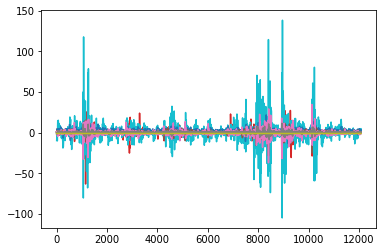

In [2]:
har.data_visulization(Activity.SITTING, 10)

### Remove Noise
`noise_removing` should be a util function to process given dataset, irrelated code, liking reading file and plot chart is removed.

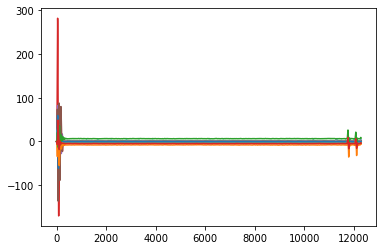

In [3]:
df = har.read_dataset_as_pd(1)
df_activity = df[df[24] == Activity.SITTING.value].values
df_activity = har.noise_removing(df_activity)
plt.plot(df_activity[:, range(24)])
plt.show()

### Feature Selection
There are dupliacated code block in sample code which is bad design in programming. Refactoring extract the sample data part into another function and use it for both training and testing data sampling.

In [4]:
har.feature_selection()

19 datasets are processing...
Training data is output into training_data.csv
Testing data is output into testing_data.csv
Feature selection and extraction finished in 15.503s


### Train and Evaluate with KNN
In sample code, the `model_training_and_evaluation_example` is too long to understand and maintain. For reading features dataset and scale it can be seperated and for KNN and SVM modals, individual implementation is more suitable for usage.

In [5]:
accuracy, c_matrix = har.classify_by_KNN(3)
print('Accuracy: ', accuracy)
print(c_matrix)

KNN: train and evaluate model in 0.308s
Accuracy:  0.9222648752399232
[[ 57   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  57   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  56   1   0   0   0   0   0   0   0   0   0]
 [  0   0   2  96   1   0   0   0   0   0   0   0   0]
 [  0   0   1   1  47   5   1   1   1   0   0   0   0]
 [  0   0   0   1  16  67   0   1   0   0   0   0   0]
 [  0   0   2   0   3   1 211   1   0   0   1   0   0]
 [  0   0   1   0   0   0   2  35   0   0   0   1   0]
 [  0   0   0   0   0   1   2   0  35   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1  95   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0  82  17   0]
 [  0   0   0   0   0   0   1   0   1   0  12  86   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0  37]]


### Train and Evaluate with SVM
The same for SVM. Additionaly, gridsearch to find the optimial classifier takes too long time. While randomized search is drastically lower and just satisfies slightly performance.

In [9]:
tuned_parameters = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
accuracy, c_matrix = har.classify_by_SVM(tuned_parameters)
print('Accuracy: ', accuracy)
print(c_matrix)

SVM: train and evaluate model in 22.054s
Accuracy:  0.9337811900191939
[[ 57   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  57   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  56   1   0   0   0   0   0   0   0   0   0]
 [  0   0   1  96   1   1   0   0   0   0   0   0   0]
 [  0   0   1   3  46   7   0   0   0   0   0   0   0]
 [  0   0   1   3  10  71   0   0   0   0   0   0   0]
 [  0   0   3   0   4   3 208   0   1   0   0   0   0]
 [  0   0   1   0   0   2   0  36   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1  36   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  96   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  88  10   0]
 [  0   1   1   0   0   0   0   0   0   0   9  89   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0  37]]


### KNN with Various Neighbour Number
Observing the parameters of KNN, notice that the number of neighbors in KNN is significant argument. Let's compare the performance and running time for the number from 1 to 10.

In [10]:
for n in range(1, 11):
    print("Running KNN with {} neighbors".format(n))
    accuracy, c_matrix = har.classify_by_KNN(n)
    print("Accuracy with {} neighbors is {}".format(n, accuracy))

Running KNN with 1 neighbors
KNN: train and evaluate model in 0.280s
Accuracy with 1 neighbors is 0.9241842610364683
Running KNN with 2 neighbors
KNN: train and evaluate model in 0.288s
Accuracy with 2 neighbors is 0.9174664107485605
Running KNN with 3 neighbors
KNN: train and evaluate model in 0.308s
Accuracy with 3 neighbors is 0.9222648752399232
Running KNN with 4 neighbors
KNN: train and evaluate model in 0.312s
Accuracy with 4 neighbors is 0.9155470249520153
Running KNN with 5 neighbors
KNN: train and evaluate model in 0.311s
Accuracy with 5 neighbors is 0.9136276391554703
Running KNN with 6 neighbors
KNN: train and evaluate model in 0.321s
Accuracy with 6 neighbors is 0.9030710172744721
Running KNN with 7 neighbors
KNN: train and evaluate model in 0.336s
Accuracy with 7 neighbors is 0.9097888675623801
Running KNN with 8 neighbors
KNN: train and evaluate model in 0.346s
Accuracy with 8 neighbors is 0.9049904030710173
Running KNN with 9 neighbors
KNN: train and evaluate model in 0.

### Try with Different Feature Number
Even use the whole columns into features, I'm still curious about the importance of feature number. Next, let's compare KNN and SVM with 6, 12, 18 and 24 columns of sensor data. Notice, in this experiment, it uses 3 neighbors in KNN and randomized searcher for SVM.

In [12]:
batch_number = 4
batch_size = 6
for i in range(batch_number):
    print("Using columns from 0 to {}".format((i+1)*batch_size))
    har.feature_selection(columns=range((i+1)*batch_size))
    accuracy, c_matrix = har.classify_by_KNN(3)
    print("Accuracy of KNN is {}".format(accuracy))
    accuracy, c_matrix = har.classify_by_SVM(tuned_parameters)
    print("Accuracy of SVM is {}".format(accuracy))
    

Using columns from 0 to 6
19 datasets are processing...
Training data is output into training_data.csv
Testing data is output into testing_data.csv
Feature selection and extraction finished in 13.897s
KNN: train and evaluate model in 0.083s
Accuracy of KNN is 0.800383877159309
SVM: train and evaluate model in 29.005s
Accuracy of SVM is 0.8080614203454894
Using columns from 0 to 12
19 datasets are processing...
Training data is output into training_data.csv
Testing data is output into testing_data.csv
Feature selection and extraction finished in 14.311s
KNN: train and evaluate model in 0.178s
Accuracy of KNN is 0.8953934740882917
SVM: train and evaluate model in 23.930s
Accuracy of SVM is 0.9040307101727447
Using columns from 0 to 18
19 datasets are processing...
Training data is output into training_data.csv
Testing data is output into testing_data.csv
Feature selection and extraction finished in 15.912s
KNN: train and evaluate model in 0.263s
Accuracy of KNN is 0.9126679462571977
SVM: